In [ ]:
import pandas as pd
import lstm_tools as lstm

2024-05-27 02:00:53.857930: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 02:00:53.858310: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 02:00:53.860939: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 02:00:53.892769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 02:00:54.584191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

[]


all days

In [2]:
ad = lstm.RunTheJoules( 'acn-jpl',
                    models_dir='./models/acn-jpl/',
                    #filename='C:/Users/Admin/OneDrive - Politecnico di Milano/Data/Load/Vehicle/ACN/train_JPL_v2.csv'
                    filename='/home/mjw/OneDrive/Data/Load/Vehicle/ACN/train_JPL_v2.csv',
                    plot_overlaid_days=False,
                    persist_days=7,
                    days_of_week=[0,1,2,3,4,5,6])



////////// lstm u24-256d[0, 0]n96 //////////



2023-10-04 01:47:12.827504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-04 01:47:12.827538: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-04 01:47:12.827566: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atium): /proc/driver/nvidia/version does not exist
2023-10-04 01:47:12.827859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 24)          3072      
                                                                 
 dropout (Dropout)           (None, None, 24)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 256)         287744    
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 dense (Dense)               (None, None, 1)           257       
                                                                 
Total params: 291,073
Trainable params: 291,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [=============================

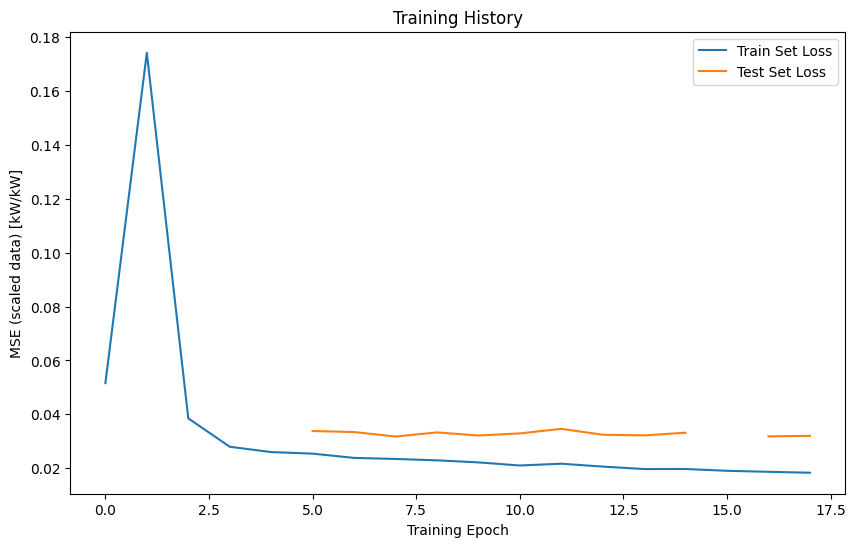

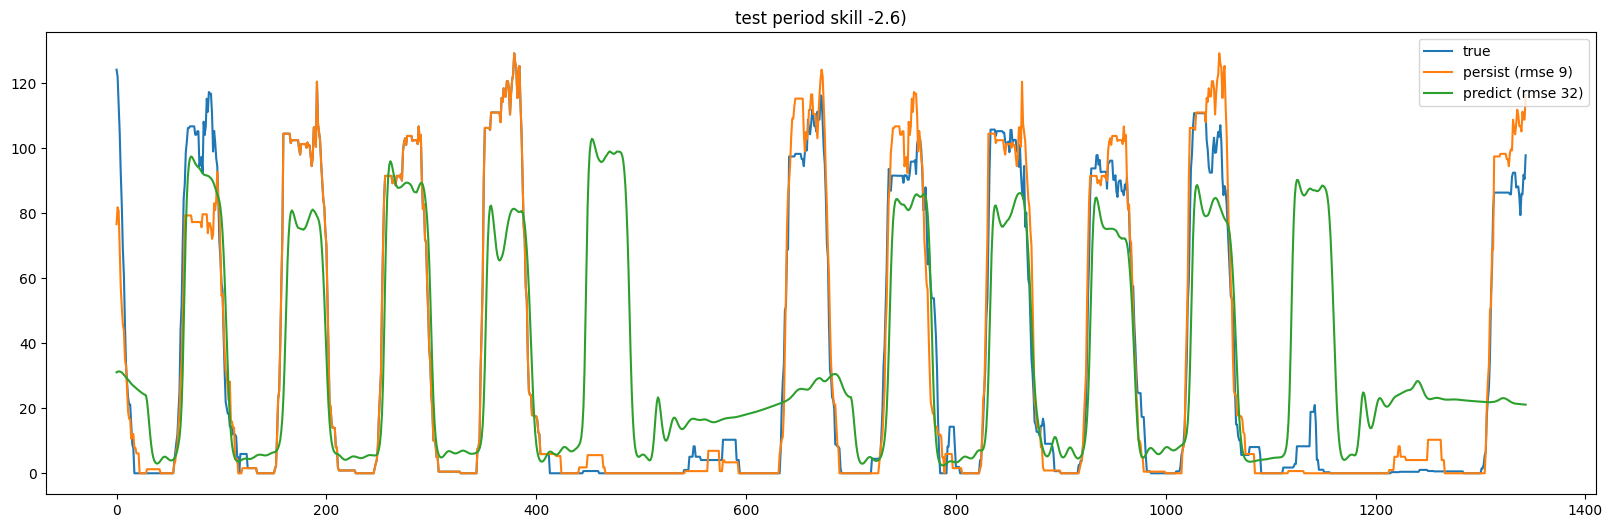

1/1 [==============================] - 0s 225ms/step


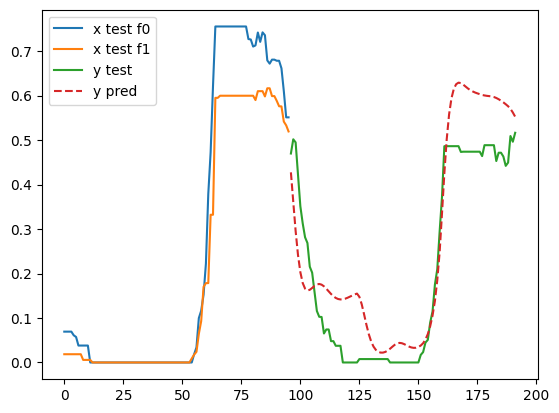

In [3]:
results, history = ad.run_them_fast(features=['Load (kW)','Persist', 'Weekday'] \
                                            + [f'IMF{x}' for x in range(3,7)],
                                    units=[24,256],
                                    dropout=2*[0],
                                    n_in=96,
                                    n_out=96,
                                    epochs=100,
                                    patience=15,
                                    plots=True,
                                    output=True,
                                    verbose=1)

weekday

In [4]:
wd = lstm.RunTheJoules( 'acn-jpl',
                    models_dir='./models/acn-jpl/',
                    #filename='C:/Users/Admin/OneDrive - Politecnico di Milano/Data/Load/Vehicle/ACN/train_JPL_v2.csv'
                    filename='/home/mjw/OneDrive/Data/Load/Vehicle/ACN/train_JPL_v2.csv',
                    plot_overlaid_days=False,
                    persist_days=1,
                    days_of_week=[0,1,2,3,4])



////////// lstm u24-256d[0, 0]n96 //////////

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 24)          2976      
                                                                 
 dropout_2 (Dropout)         (None, None, 24)          0         
                                                                 
 lstm_3 (LSTM)               (None, None, 256)         287744    
                                                                 
 dropout_3 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_1 (Dense)             (None, None, 1)           257       
                                                                 
Total params: 290,977
Trainable params: 290,977
Non-trainable params: 0
_________________________________________________________________


100/100 [==============================] - ETA: 0s - loss: nan
Epoch 1: val_loss did not improve from inf
100/100 [==============================] - 34s 327ms/step - loss: nan - val_loss: nan
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: nan
Epoch 2: val_loss did not improve from inf
100/100 [==============================] - 33s 325ms/step - loss: nan - val_loss: nan
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: nan
Epoch 3: val_loss did not improve from inf
100/100 [==============================] - 33s 326ms/step - loss: nan - val_loss: nan
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: nan
Epoch 4: val_loss did not improve from inf
100/100 [==============================] - 33s 325ms/step - loss: nan - val_loss: nan
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: nan
Epoch 5: val_loss did not improve from inf
100/100 [==============================] - 33s 325ms/step - loss: nan - val_lo

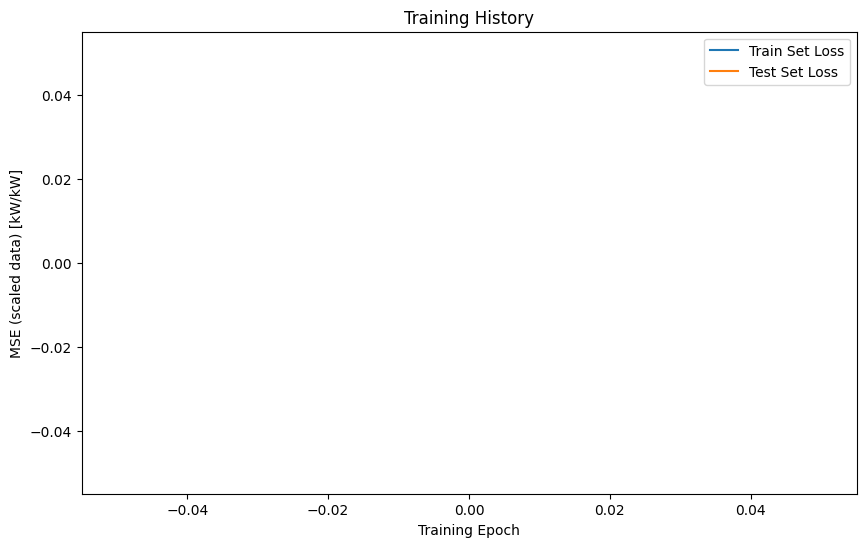

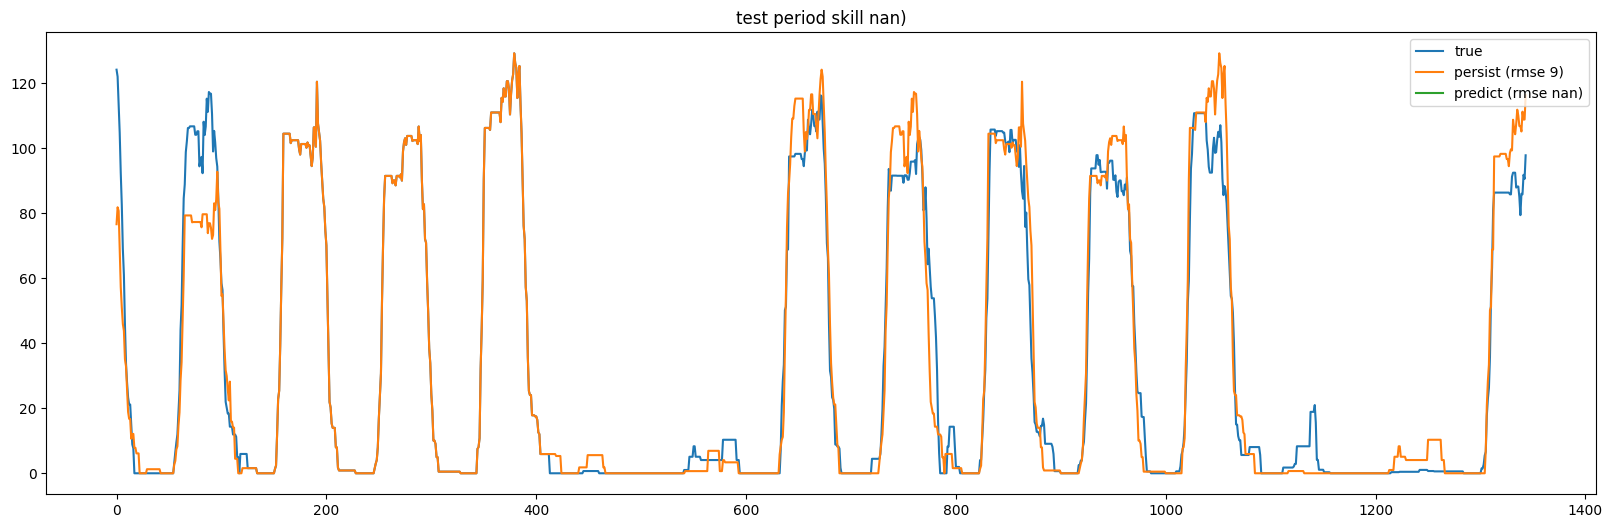

1/1 [==============================] - 0s 221ms/step


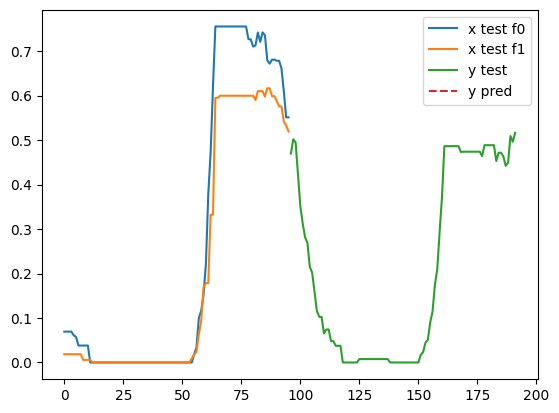

In [5]:
results, history = ad.run_them_fast(features=['Load (kW)','Persist'] \
                                            + [f'IMF{x}' for x in range(3,7)],
                                    units=[24,256],
                                    dropout=2*[0],
                                    n_in=96,
                                    n_out=96,
                                    epochs=100,
                                    patience=15,
                                    plots=True,
                                    output=True,
                                    verbose=1)

weekend

In [6]:
we = lstm.RunTheJoules( 'acn-jpl',
                    models_dir='./models/acn-jpl/',
                    #filename='C:/Users/Admin/OneDrive - Politecnico di Milano/Data/Load/Vehicle/ACN/train_JPL_v2.csv'
                    filename='/home/mjw/OneDrive/Data/Load/Vehicle/ACN/train_JPL_v2.csv',
                    plot_overlaid_days=False,
                    persist_days=1,
                    days_of_week=[5,6])



////////// lstm u24-256d[0, 0]n96 //////////

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 24)          2592      
                                                                 
 dropout_4 (Dropout)         (None, None, 24)          0         
                                                                 
 lstm_5 (LSTM)               (None, None, 256)         287744    
                                                                 
 dropout_5 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_2 (Dense)             (None, None, 1)           257       
                                                                 
Total params: 290,593
Trainable params: 290,593
Non-trainable params: 0
_________________________________________________________________


100/100 [==============================] - ETA: 0s - loss: 0.1037
Epoch 1: val_loss did not improve from inf
100/100 [==============================] - 34s 327ms/step - loss: 0.1037 - val_loss: nan
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.0926
Epoch 2: val_loss did not improve from inf
100/100 [==============================] - 32s 325ms/step - loss: 0.0926 - val_loss: nan
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.0909
Epoch 3: val_loss did not improve from inf
100/100 [==============================] - 32s 325ms/step - loss: 0.0909 - val_loss: nan
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.0916
Epoch 4: val_loss did not improve from inf
100/100 [==============================] - 32s 325ms/step - loss: 0.0916 - val_loss: nan
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 0.0907
Epoch 5: val_loss did not improve from inf
100/100 [==============================] - 32s 324m

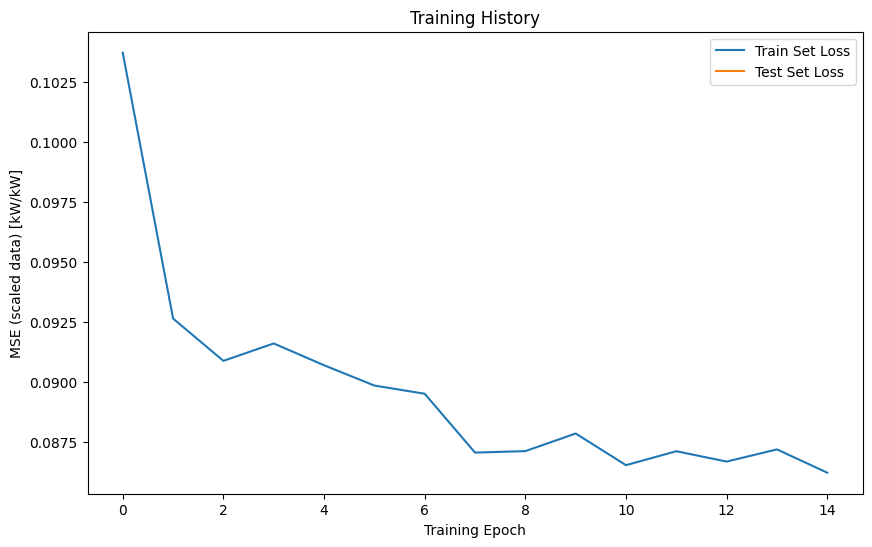

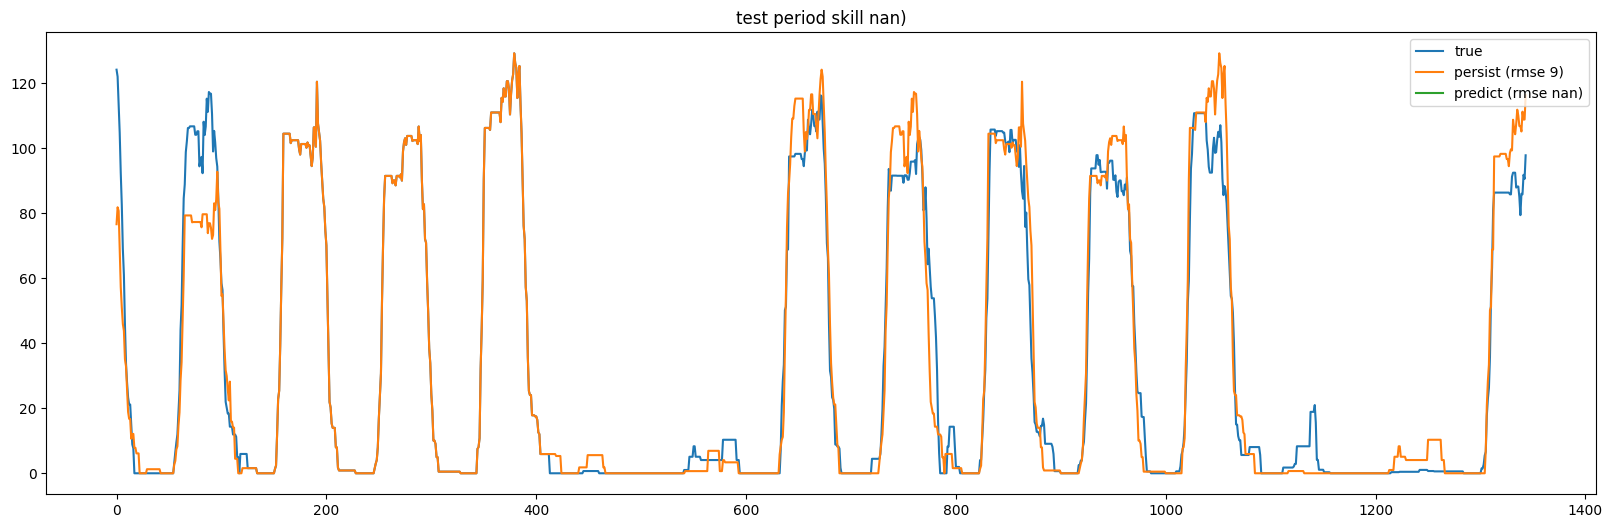

1/1 [==============================] - 0s 223ms/step


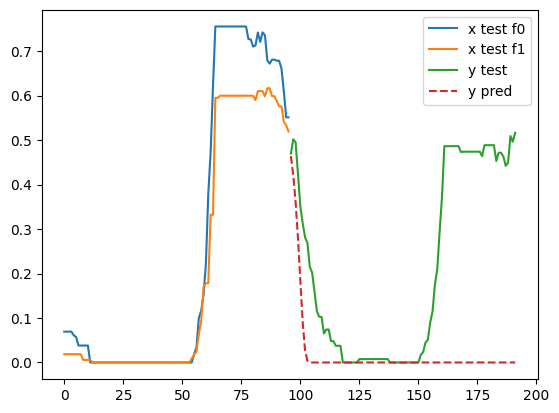

In [7]:
results, history = ad.run_them_fast(features=['Load (kW)','Persist'], #\
                                            #+ [f'IMF{x}' for x in range(3,7)],
                                    units=[24,256],
                                    dropout=2*[0],
                                    n_in=96,
                                    n_out=96,
                                    epochs=100,
                                    patience=15,
                                    plots=True,
                                    output=True,
                                    verbose=1)

attempt to get make forecast based on t_now in test data

In [7]:
filename = r'/home/mjw/OneDrive/Data/Load/Vehicle/ACN/test_JPL_v2.csv'

df = pd.read_csv(   filename,     
                    comment='#',
                    parse_dates=True,
                    index_col=0,
                    usecols=[0,1] )

df.columns = ['Load (kW)']

#df = df.tz_localize('Etc/GMT+8',ambiguous='infer') # or 'US/Eastern' but no 'US/Pacific'
df = df.resample('15min').mean()
#df = df.tz_convert(None)
df = df.fillna(method='ffill').fillna(method='bfill')

df = df[df.index.weekday.isin(list(range(7)))]

df = lstm.emd_sift(df)
                                                        
#df['Day'] = df.index.dayofyear
#df['Hour'] = df.index.hour
#df['Weekday'] = df.index.dayofweek

df['Persist'] = df['Load (kW)'].shift(5*96)

df = df.dropna()#df.fillna(method='bfill')

In [8]:
df

,Load (kW),IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,IMF10,Persist
times_utc,,,,,,,,,,,,
2023-01-06 00:00:00,0.000000,-10.760435,34.860952,-67.114409,-1.203987,-1.266262,21.422453,9.560803,-3.512326,-8.636470,1.129158,1.558381
2023-01-06 00:15:00,0.000000,-10.104109,35.007826,-68.972815,-0.119946,-1.318759,21.407689,9.580712,-3.497534,-8.632409,1.128706,1.558381
2023-01-06 00:30:00,0.000000,-9.380978,34.806627,-70.568917,0.983942,-1.370232,21.391291,9.600345,-3.482739,-8.628348,1.128255,1.558381
2023-01-06 00:45:00,0.000000,-8.591711,34.265733,-71.910151,2.107353,-1.420625,21.373253,9.619704,-3.467943,-8.624286,1.127803,1.558381
2023-01-06 01:00:00,0.000000,-7.732163,33.389308,-73.004547,3.249953,-1.469880,21.353572,9.638788,-3.453145,-8.620223,1.127352,1.558381
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:45:00,1.007389,4.929385,10.288421,5.540607,-49.349486,-7.716298,11.632271,9.587547,-16.417719,0.357075,-0.025688,6.992231
2023-12-31 23:00:00,0.000000,5.508088,10.331917,5.287151,-50.744572,-7.649969,11.589894,9.583191,-16.418911,0.357643,-0.025664,0.539909
2023-12-31 23:15:00,0.000000,7.245134,10.284890,4.774753,-51.941911,-7.582575,11.547304,9.578741,-16.420099,0.358211,-0.025640,0.539909
